In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('anime.csv')

In [3]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
data1 = data.dropna()

In [6]:
data1.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [7]:
data1.nunique()

anime_id    12017
name        12015
genre        3229
type            6
episodes      187
rating        598
members      6596
dtype: int64

In [8]:
data1['genre'].value_counts()

Hentai                                                   816
Comedy                                                   521
Music                                                    297
Kids                                                     197
Comedy, Slice of Life                                    174
                                                        ... 
Adventure, Comedy, Horror, Shounen, Supernatural           1
Comedy, Harem, Romance, School, Seinen, Slice of Life      1
Comedy, Ecchi, Sci-Fi, Shounen                             1
Adventure, Shounen, Sports                                 1
Hentai, Slice of Life                                      1
Name: genre, Length: 3229, dtype: int64

# Feature extraction

In [9]:
#conerting categorical data usin one hot
genres = data1['genre'].str.get_dummies(sep=', ')
data_numerical = pd.concat([data1.drop('genre', axis=1), genres], axis=1)

In [10]:
#standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['rating', 'members']
data_numerical[numerical_cols] = scaler.fit_transform(data_numerical[numerical_cols])

data_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.824474,3.292044,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.717032,14.002410,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.707265,1.732216,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.629126,11.833499,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.619358,2.400518,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


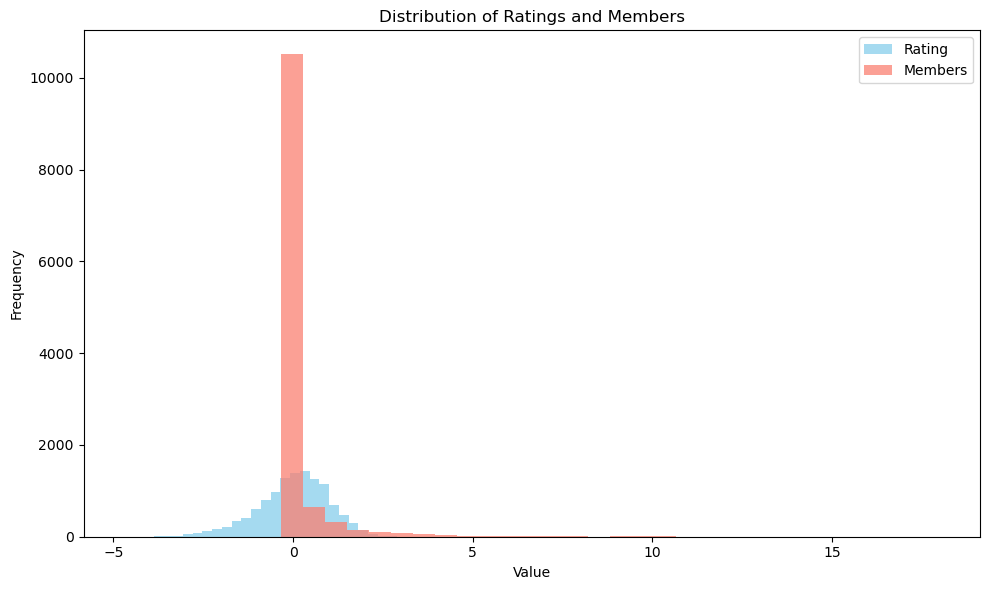

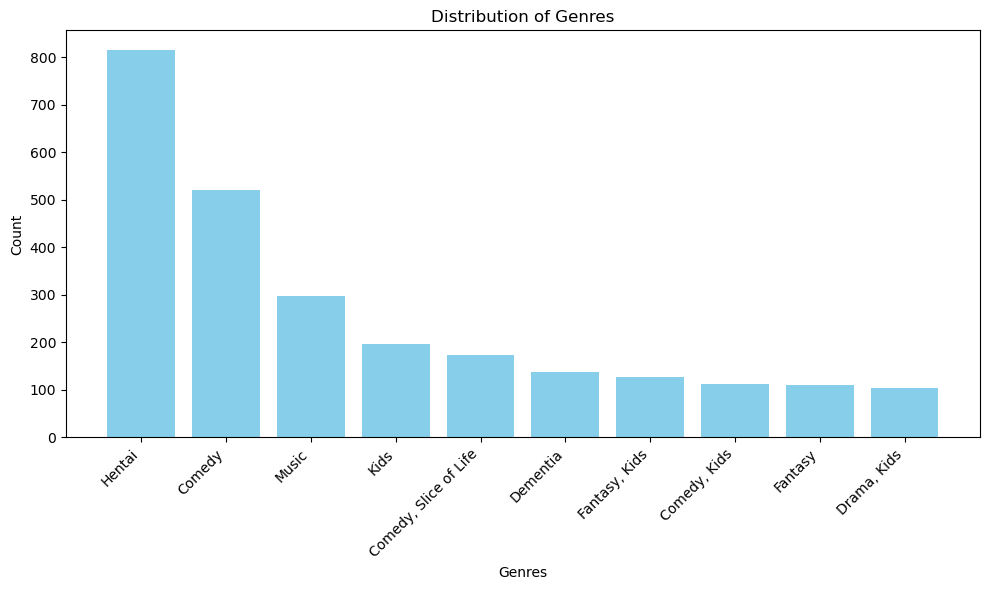

In [11]:
import matplotlib.pyplot as plt

top_genres = data1['genre'].value_counts().index[:10]
genre_counts = data1['genre'].value_counts().head(10)

# Plot distribution of scaled numerical features (Ratings and Members)
plt.figure(figsize=(10, 6))

# Distribution of Ratings
plt.hist(data_numerical['rating'], bins=30, color='skyblue', alpha=0.75, label='Rating')

# Distribution of Members
plt.hist(data_numerical['members'], bins=30, color='salmon', alpha=0.75, label='Members')

plt.title('Distribution of Ratings and Members')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Plot distribution of genres
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Genres')
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability
plt.tight_layout()
plt.show()

In [12]:
#recommended system

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_anime(target_anime, threshold=0.5):
    # Find the row corresponding to the target anime
    target_row = data_numerical[data_numerical['name'] == target_anime].drop(['name', 'type'], axis=1)

    # Replace 'Unknown' values in 'episodes' column with NaN
    data_numerical['episodes'] = pd.to_numeric(data_numerical['episodes'], errors='coerce')

    # Drop rows with NaN values in 'episodes' column
    data_numerical.dropna(subset=['episodes'], inplace=True)

    # Compute cosine similarity between target anime and all other anime
    similarities = cosine_similarity(target_row, data_numerical.drop(['name', 'type'], axis=1))

    # Get indices of anime with similarity above threshold
    similar_anime_indices = np.where(similarities > threshold)[1]

    # Exclude the target anime itself from recommendations
    similar_anime_indices = similar_anime_indices[similar_anime_indices != target_row.index[0]]

    # Get names of recommended anime
    recommended_anime = data_numerical.iloc[similar_anime_indices]['name'].tolist()

    return recommended_anime   

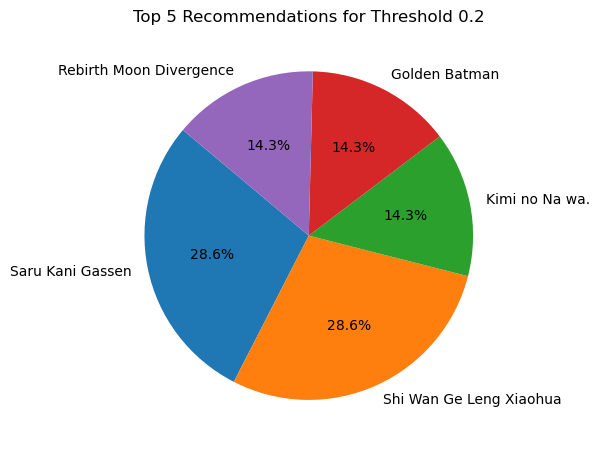


Recommendations for threshold 0.2:
Recommended anime similar to 'Steins;Gate':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11819       Toushindai My Lover: Minami tai Mecha-Minami
11820                                        Under World
11821                     Violence Gekiga David no Hoshi
11822  Violence Gekiga Shin David no Hoshi: Inma Dens...
11823                   Yasuji no Pornorama: Yacchimae!!

[11824 rows x 1 columns]

Number of recommendations: 11824

Value counts of recommended anime:
Saru Kani Gassen                                       2
Shi Wan Ge Leng Xiaohua                                2
Kimi no Na wa.            

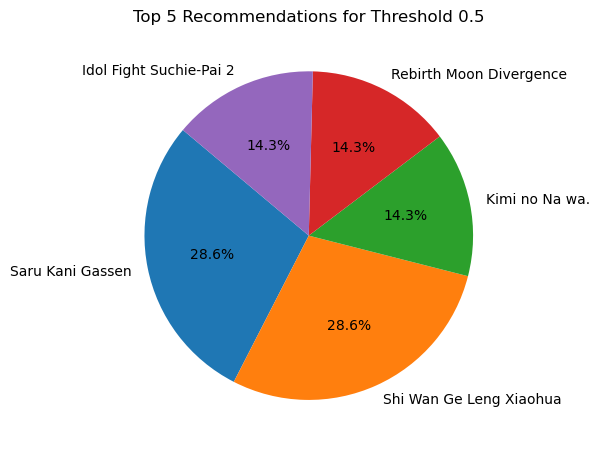


Recommendations for threshold 0.5:
Recommended anime similar to 'Steins;Gate':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11813       Toushindai My Lover: Minami tai Mecha-Minami
11814                                        Under World
11815                     Violence Gekiga David no Hoshi
11816  Violence Gekiga Shin David no Hoshi: Inma Dens...
11817                   Yasuji no Pornorama: Yacchimae!!

[11818 rows x 1 columns]

Number of recommendations: 11818

Value counts of recommended anime:
Saru Kani Gassen                    2
Shi Wan Ge Leng Xiaohua             2
Kimi no Na wa.                      1
Rebirth Moon Divergence   

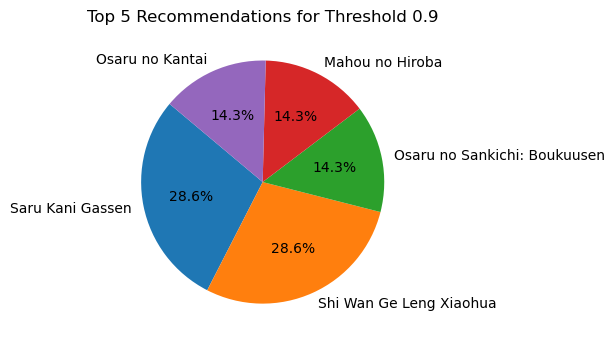


Recommendations for threshold 0.9:
Recommended anime similar to 'Steins;Gate':
                                       Recommended Anime
0                                         Kimi no Na wa.
1                       Fullmetal Alchemist: Brotherhood
2                                               Gintama°
3                                          Gintama&#039;
4      Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
...                                                  ...
11779       Toushindai My Lover: Minami tai Mecha-Minami
11780                                        Under World
11781                     Violence Gekiga David no Hoshi
11782  Violence Gekiga Shin David no Hoshi: Inma Dens...
11783                   Yasuji no Pornorama: Yacchimae!!

[11784 rows x 1 columns]

Number of recommendations: 11784

Value counts of recommended anime:
Saru Kani Gassen                          2
Shi Wan Ge Leng Xiaohua                   2
Osaru no Sankichi: Boukuusen              1
Mahou no

In [14]:
import matplotlib.pyplot as plt

threshold_values = [0.2, 0.5, 0.9]
target_anime = 'Steins;Gate'

for threshold in threshold_values:
    # Get recommendations for the current threshold
    recommended_anime = recommend_similar_anime(target_anime, threshold=threshold)

    # Creating a DataFrame to display the recommended anime
    data_recommendations = pd.DataFrame(recommended_anime, columns=['Recommended Anime'])

    # Add additional information
    num_recommendations = len(recommended_anime)
    value_counts = data_recommendations['Recommended Anime'].value_counts()
    top_5_recommendations = value_counts.head(5)

    # Create pie chart of the top 5 recommendations
    plt.figure(figsize=(6, 6))
    plt.pie(top_5_recommendations.values, labels=top_5_recommendations.index,
            autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 5 Recommendations for Threshold {threshold}')
    plt.tight_layout()
    plt.show()

    # Display the information for the current threshold
    print(f"\nRecommendations for threshold {threshold}:")
    print("Recommended anime similar to '{}':".format(target_anime))
    print(data_recommendations)
    print("\nNumber of recommendations:", num_recommendations)
    print("\nValue counts of recommended anime:")
    print(value_counts)
    print("\nTop 5 recommendations:")
    print(top_5_recommendations)

# Evaluation:
In a recommender system, the typical approach for splitting the dataset into training and testing sets 
and evaluating the system involves treating the task as a binary classification problem. Specifically, 
I want to predict whether a user will like (or interact with) a certain anime or not.

In [15]:
pd.set_option('display.max_columns', None)
data_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:

# Calculate mean and standard deviation for episodes, rating, and members
mean_episodes = 12.486729
mean_rating = 0.006197
mean_members = 0.002928

std_dev_episodes = np.std(data_numerical['episodes'])
std_dev_rating = np.std(data_numerical['rating'])
std_dev_members = np.std(data_numerical['members'])

# Set threshold values
episodes_threshold = mean_episodes + std_dev_episodes
rating_threshold = mean_rating + std_dev_rating
members_threshold = mean_members + std_dev_members

print("Threshold values:")
print("Episodes threshold:", episodes_threshold)
print("Rating threshold:", rating_threshold)
print("Members threshold:", members_threshold)

Threshold values:
Episodes threshold: 59.58186967572618
Rating threshold: 1.0015968731095757
Members threshold: 1.0029082457034983


In [17]:
# Define threshold values for ratings, episodes, and members
rating_threshold = 1.001596873109577
episodes_threshold = 59.58186967572351
members_threshold = 1.0029082457034968

# Create binary target variable based on thresholds
data_numerical['liked'] = ((data_numerical['rating'] >= rating_threshold) |
                         (data_numerical['episodes'] >= episodes_threshold) |
                         (data_numerical['members'] >= members_threshold)).astype(int)

# Display the updated dataset with the new 'liked' column
data_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1.0,2.824474,3.292044,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,2.717032,14.002410,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51.0,2.707265,1.732216,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24.0,2.629126,11.833499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51.0,2.619358,2.400518,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [18]:
from sklearn.model_selection import train_test_split

X = data_numerical.drop(['name', 'type','anime_id'], axis=1)  # Features
y = data_numerical['liked']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a binary classification model (logistic regression) using the scaled training set
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy,precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [20]:
#our model preovides excellent results with perfect accuracy

In [21]:
#1. Can you explain the difference between user-based and item-based collaborative filtering?
# User-based Collaborative Filtering:
# Focuses on similarities between users.
# Recommends items to a user that similar users have liked.
# Example: “Users like you also enjoyed X.”

# Item-based Collaborative Filtering:
# Focuses on similarities between items.
# Recommends items similar to what the user has already liked.
# Example: “Because you liked X, you might also like Y.”

In [ ]:
# 2. What is collaborative filtering, and how does it work?
# Collaborative Filtering (CF) is a recommendation approach that relies on the interactions 
# (ratings, likes, purchases) between users and items.

# How it works:
# Assumes that similar users will like similar items (user-based)
# OR
# Similar items are liked by similar users (item-based)
# Builds a user-item interaction matrix (ratings, views, etc.)
# Computes similarity:
# For users: based on past behavior (e.g., cosine similarity, Pearson correlation)
# For items: based on co-occurrence or rating patterns
# Predicts unseen interactions using these similarities.